# Cartography of Guimera

This notebook displays the cartography of guiera in two dimensions, showing the distribution of nodes in different roles.

In [1]:

import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

The networks to be used are established.

In [2]:
g_files=['carnival_tourist','no_carnival_tourist','carnival_residents','no_carnival_residents']


Subsequently, the function that determines whether a node belongs to a role is defined. This function is necessary to delineate the boundaries of each role. The function that will represent the graphs is also defined.

In [3]:


h=0.005

cmap_light = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#0F0F0F', '#000FFF', '#FF00FF', '#00FFFF'])
labels = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7']



def my_classifier(p,z):
    """
    This is a classification function of the guimera mapping that classifies based on x[0] and x[1], which are Participation coefficient and Within-module degree.
    :param p: Participation coefficient
    :type p: float
    :param z: Within-module degree
    :type z: float
    :return: void
    :rtype: None
    """
    
    if z>=2.5:
        if p<0.31:
            return 5
        elif p<0.75:
            return 6
        else:
            return 7
            #HUB
    else:
        if p<0.05:
            return 1
        elif p<0.625:
            return 2
        elif p<0.8:
            return 3
        else:
            return 4
def plot_cg(dZ,dP):
    # We draw the decision boundary. To do this, we will assign a color to each point in the grid [x_min, x_max]x[y_min, y_max].
    x_min, x_max = 0,1
    y_min, y_max = -2, 8
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.array([my_classifier(x,y) for x,y in np.c_[xx.ravel(), yy.ravel()]])
    
    # We put the result in a color grid.
    Z = Z.reshape(xx.shape)
    plt.figure()
    c=plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.xlabel("Participation coefficient, P")
    plt.xticks(np.linspace(0,1,11))
    plt.ylim(yy.min(), yy.max())
    
    plt.ylabel("Within-module degree, Z")
    plt.yticks(np.linspace(-2,8,11))
    plt.title("Role Map")
    lpatch=list()
    for i in range(7):
        lpatch.append( mpatches.Patch(color=c.cmap(1/7*i+0.01), label=labels[i]))
    
    # Add caption
    plt.legend(handles=lpatch,bbox_to_anchor=(1.05, 1), loc='upper left')
    for i in dZ:
        plt.plot(dP[i],dZ[i],color='black',marker='o')
    
    plt.show()


The previously defined list of networks is displayed.

Complex network:  carnival_tourist


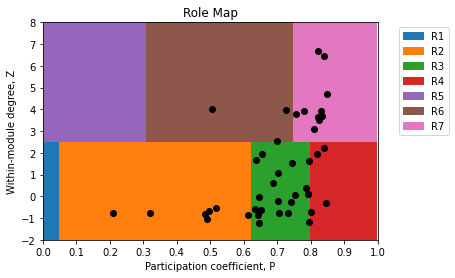

Complex network:  no_carnival_tourist


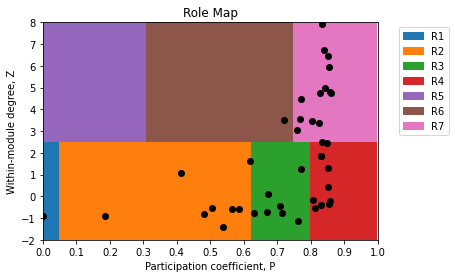

Complex network:  carnival_residents


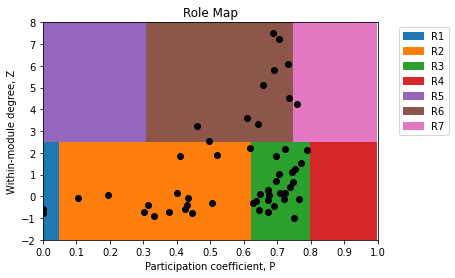

Complex network:  no_carnival_residents


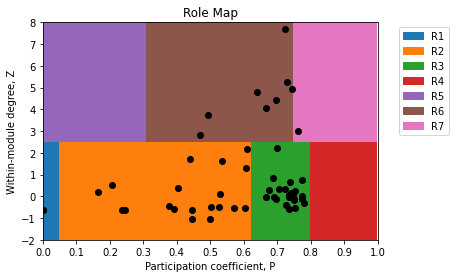

In [4]:
for i in g_files:
    print("Complex network: ",i)
    with open(i+'_z.pickle', 'rb') as handle:
        dZ = pickle.load(handle)
    with open(i+'_p.pickle', 'rb') as handle:
        dP = pickle.load(handle)
    plot_cg(dZ,dP)